<a href="https://colab.research.google.com/github/saubhagya-sharma/CarPrice_Prediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data collection and processing

In [50]:
df=pd.read_csv('car data.csv')

In [51]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [53]:
#code to check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [54]:
#checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data

In [55]:
#Encoding Seller_Type column
df.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)

#Encoding transmission column
df.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

#Encoding Fuel_Type column
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)

In [57]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and target

In [59]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [61]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [63]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting training and test data

In [64]:
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size=0.1, random_state=2)

Model training

**1. Linear Regression**


In [69]:
#loading linear regression model
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [71]:
#Prediction on training data
training_data_prediction=lin_reg_model.predict(X_train)

In [74]:
#R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R Squared Error: ',error_score)

R Squared Error:  0.8799451660493711


Visualise actual prices and predicted prices

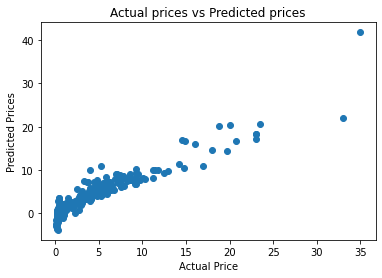

In [76]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [77]:
#Prediction on training data
test_data_prediction=lin_reg_model.predict(X_test)

In [78]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R Squared Error: ',error_score)

R Squared Error:  0.8365766715027051


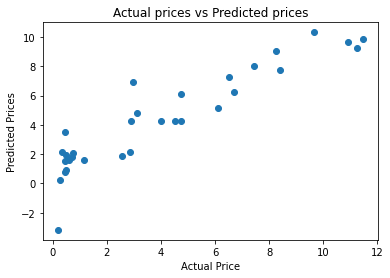

In [79]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

**2. Lasso regression**

In [80]:
#loading lasso regression model
lass_reg_model=Lasso()
lass_reg_model.fit(X_train, Y_train)

Lasso()

Model Evaluation

In [81]:
#Prediction on training data
training_data_prediction=lass_reg_model.predict(X_train)

In [82]:
#R squared error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print('R Squared Error: ',error_score)

R Squared Error:  0.8427856123435794


Visualise actual prices and predicted prices

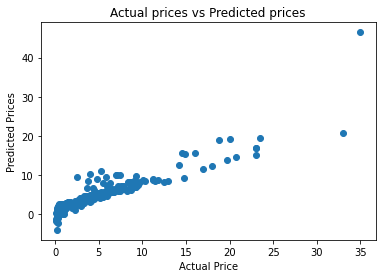

In [83]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted prices")
plt.show()

In [84]:
#Prediction on training data
test_data_prediction=lass_reg_model.predict(X_test)

In [85]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print('R Squared Error: ',error_score)

R Squared Error:  0.8709167941173195


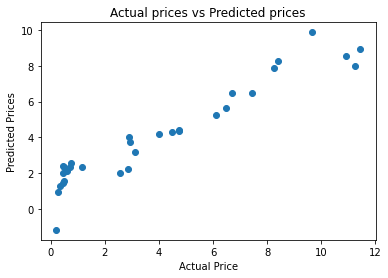

In [86]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted prices")
plt.show()